Домашнее задание к 1 уроку

Формирование данных

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# Пусть имеем 6 наблюдений по три признака и соответсвенно 6 реультататов
x1 = [1,3,3]
y1 =4
x2 = [2,4,8]
y2 = 6
x3 = [3,5,8]
y3 = 7
x4 = [1,2,3]
y4 =3
x5 = [0,2,1]
y5 = 2
x6 = [1,8,7]
y6 =25

In [3]:
# матрица признаком со вспосогательным столбцом
X = np.array([x1,x2,x3,x4,x5,x6])
a = np.ones((6,1))
X = np.append(a,X,axis = 1)
X

array([[1., 1., 3., 3.],
       [1., 2., 4., 8.],
       [1., 3., 5., 8.],
       [1., 1., 2., 3.],
       [1., 0., 2., 1.],
       [1., 1., 8., 7.]])

In [4]:
Y = np.array([y1,y2,y3,y4,y5,y6]).reshape(-1,1)
Y

array([[ 4],
       [ 6],
       [ 7],
       [ 3],
       [ 2],
       [25]])

In [5]:
W=np.zeros((4,1))
W

array([[0.],
       [0.],
       [0.],
       [0.]])

In [6]:
def mae (Y,Y_pred):
    return (np.abs(Y-Y_pred)).mean()

In [7]:
def mse(Y,Y_pred):
    return ((Y-Y_pred)**2).mean()

In [8]:
X

array([[1., 1., 3., 3.],
       [1., 2., 4., 8.],
       [1., 3., 5., 8.],
       [1., 1., 2., 3.],
       [1., 0., 2., 1.],
       [1., 1., 8., 7.]])

In [9]:
Y_pred=X@W
mse(Y,Y_pred),mae(Y,Y_pred)

(123.16666666666667, 7.833333333333333)

In [10]:
# Попоробуем решить задачу аналитическим способом
W = np.linalg.inv(X.T@X)@X.T@Y
W


array([[-4.60608021],
       [-2.91203105],
       [ 3.83958603],
       [ 0.1927555 ]])

In [11]:
Y_pred  = X@W
Y_pred

array([[ 4.57891332],
       [ 6.4702458 ],
       [ 7.39780078],
       [ 0.7393273 ],
       [ 3.26584735],
       [24.54786546]])

In [12]:
# Посчитаем ошибки
err_a = mae(Y,X@W)
err_s = mse(Y,X@W)
err_a,err_s


(0.90426908150065, 1.2719922380336346)

In [13]:
# Проверим как считает функция solve
W1 = np.linalg.solve(X.T@X,X.T@Y)
W1,mse(Y,X@W1)

(array([[-4.60608021],
        [-2.91203105],
        [ 3.83958603],
        [ 0.1927555 ]]),
 1.2719922380336344)

Считает так же :)

Напишем функцию градиентного спуска

In [14]:
alpha = 0.0001
Wr=np.zeros((4,1))
count_iter = 10000

In [15]:
def gradient_descent(alpha,Wr,X,Y,count_iter):
    data=[]
    number_obj,number_features = X.shape
    for  i in range(count_iter):
        Y_pred = X@Wr
        data.append(mse(Y,Y_pred))
        delta = Y_pred-Y
        Wr-=alpha*2/number_obj*(X.T@delta)
    return Wr,data
    

In [16]:
W_n ,data = gradient_descent(alpha,Wr,X,Y,count_iter)
W_n,data[-1]

(array([[-1.32779278],
        [-1.89212883],
        [ 3.62298537],
        [-0.42691566]]),
 3.882833891876842)

Решение для данных показателей, получилось  - не очень!

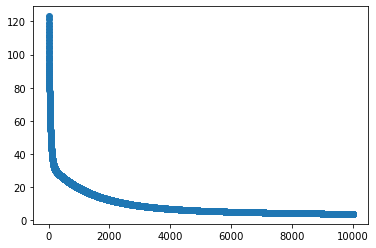

In [17]:
plt.scatter([i for i in range(count_iter)],data)

In [18]:
print(100*'-')

----------------------------------------------------------------------------------------------------


Задание 1. Подберите скорость обучения (alpha) и количество итераций для достижения минимальног значения функции потерь;

Через визуализацию на графике

Видно, что с alpha = 0.0001, 10 000 итераций мало. Попробуем 200 000

In [19]:
alpha = 0.0001
Wr=np.zeros((4,1))
count_iter = 200000
W_n ,data = gradient_descent(alpha,Wr,X,Y,count_iter)
W_n,data[-1]

(array([[-4.60206533],
        [-2.91739127],
        [ 3.83778137],
        [ 0.194932  ]]),
 1.2719981024627327)

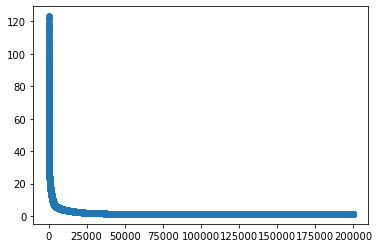

In [20]:
plt.scatter([i for i in range(count_iter)],data)

альфа 0,0001 и кол итераций 200 000 выидают нужный результат

Сократим альфа до 0,01

In [21]:
alpha = 0.01
Wr=np.zeros((4,1))
count_iter = 10000
W_n ,data = gradient_descent(alpha,Wr,X,Y,count_iter)
W_n,data[-1]

(array([[-4.60608021],
        [-2.91203105],
        [ 3.83958603],
        [ 0.1927555 ]]),
 1.271992238033635)

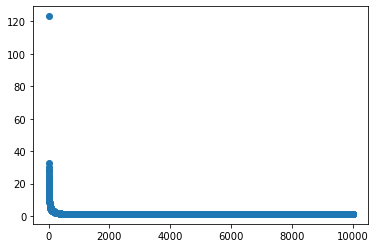

In [22]:
plt.scatter([i for i in range(count_iter)],data)

Судя по графику при таком альфа достаточно 2000 итераций

In [23]:
alpha = 0.01
Wr=np.zeros((4,1))
count_iter = 2000
W_n ,data = gradient_descent(alpha,Wr,X,Y,count_iter)
W_n,data[-1]


(array([[-4.60209617],
        [-2.91737132],
        [ 3.83778999],
        [ 0.19492494]]),
 1.2719980677789067)

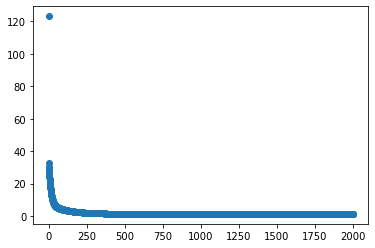

In [24]:
plt.scatter([i for i in range(count_iter)],data)

Таким образом оптимальный вариант альфа = 0,01 , количество шагов 2000

In [25]:
print(100*'-')

----------------------------------------------------------------------------------------------------


Задача 2 В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

for i in range(1000):

    y_pred = np.dot(W, X)
    
    err = calc_mse(y, y_pred)
    
    '''for ii in range(W.shape[0]):
    
    W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))'''
    
    W -= (alpha * (1/n * 2 * np.sum(X * (y_pred - y))))
    
    if i % 100 == 0:
    
        print(i, W, err)

Павильный ответ: W -= (alpha * (1/n * 2 * X.T @ (y_pred - y)))

In [26]:
print(100*'-')

----------------------------------------------------------------------------------------------------


3 (опция). Реализовать один из критериев останова, перечисленный в методичке.

Поиск оптимвльных знгачений методом градиентного спуска. В качестве критерия возмемем минималную разнгость ошибки

In [27]:
def gradient_descent_new(Wr,X,Y,alpha=0.01,count_iter=1000000,delta_error =0.0000000001 ):
    mse_old = np.inf
    data=[]
    number_obj,number_features = X.shape
    for  i in range(1,count_iter):
        Y_pred = X@Wr
        mse_n = mse(Y,Y_pred)
        data.append(mse_n)
        if mse_old-mse_n<delta_error:
            return Wr,data
        mse_old = mse_n
        delta = Y_pred-Y
        Wr-=alpha*2/number_obj*(X.T@delta)
    return Wr,data
    

In [28]:
Wr=np.zeros((4,1))
W_n ,data = gradient_descent_new(Wr,X,Y)
W_n,data[-1]

(array([[-4.60587798],
        [-2.91239489],
        [ 3.83947192],
        [ 0.19290785]]),
 1.27199226086312)

In [29]:
len(data)

3262